# Môn: Trực quan hóa dữ liệu - 18_21
# Đồ án cuối kỳ

**Nhóm 7 - thông tin thành viên:**


In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.api import add_constant, OLS

pd.set_option("display.max_columns", None)

# Đọc dữ liệu

In [2]:
data_df = pd.read_excel('energy_consuming.xlsx')
data_df

,Climatic region,Ownership,Number of occupants,House age,House typology,Function other than residential,Number of floor,Total floor area,summer daylight,summer thermal comfort,summer natural ventilation,Winter daylight,Winter thermal comfort,Winter natural ventilation,Source of energy,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,Solar hotwater,Energy efficiency equipment,total energy consumption,energy per person
0,North,shared rent,4,5.0,Attached row house,No,3,110.0,4,2,3,2,2,3,Electricity and gas,100000.0,440000.0,100000.0,0,1,No,Yes,540000,135000.000000
1,Center,privately own,6,5.0,Detached house,No,5,180.0,4,3,4,4,2,4,Electricity and gas,375000.0,1800000.0,1800000.0,5,5,Yes,No,2175000,362500.000000
2,North,privately rent,4,5.0,Attached row house,No,3,30.0,5,1,3,5,3,3,Electricity and gas,100000.0,240000.0,240000.0,0,1,No,No,340000,85000.000000
3,North,privately rent,1,5.0,Attached row house,No,5,30.0,4,3,3,4,4,3,Electricity and gas,100000.0,100000.0,100000.0,0,0,No,No,200000,200000.000000
4,North,privately own,7,5.0,Attached row house,office,5,240.0,4,3,3,4,4,3,Electricity,NaN,1800000.0,1330000.0,5,5,No,Yes,1800000,257142.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,North,privately own,4,15.0,Attached row house,No,2,70.0,4,4,4,4,4,4,Electricity and gas,100000.0,675000.0,100000.0,1,2,No,Yes,775000,193750.000000
149,North,privately own,3,5.0,Attached row house,No,4,180.0,4,2,3,4,3,3,Electricity,NaN,1330000.0,930000.0,1,1,Yes,Yes,1330000,443333.333333
150,South,privately rent,2,5.0,Apartment,No,1,110.0,2,2,2,1,1,1,Electricity and gas,100000.0,675000.0,240000.0,3,2,No,No,775000,387500.000000
151,North,privately own,2,5.0,Attached row house,No,2,180.0,3,3,3,3,3,2,Electricity and gas,100000.0,240000.0,100000.0,1,1,Yes,Yes,340000,170000.000000


In [4]:
data_df.dtypes

Climatic region                        object
Ownership                              object
Number of occupants                     int64
House age                             float64
House typology                         object
Function other than residential        object
Number of floor                         int64
Total floor area                      float64
summer daylight                         int64
summer thermal comfort                  int64
summer natural ventilation              int64
Winter daylight                         int64
Winter thermal comfort                  int64
Winter natural ventilation              int64
Source of energy                       object
Gas consumption                       float64
maximum electricity consumption       float64
minimum electricity consumption       float64
number of airconditioning               int64
number of electricity water heater      int64
Solar hotwater                         object
Energy efficiency equipment       

In [5]:
data_df.describe()

,Number of occupants,House age,Number of floor,Total floor area,summer daylight,summer thermal comfort,summer natural ventilation,Winter daylight,Winter thermal comfort,Winter natural ventilation,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,total energy consumption,energy per person
count,153.000000,150.000000,153.000000,146.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,97.000000,1.510000e+02,1.510000e+02,153.000000,153.000000,1.530000e+02,1.530000e+02
mean,4.019608,11.800000,3.032680,127.945205,3.54902,2.941176,3.261438,3.366013,3.254902,3.346405,238659.793814,9.328808e+05,5.153311e+05,2.000000,1.712418,1.071993e+06,2.774647e+05
std,1.519481,7.969741,1.378492,71.166806,0.99301,1.040213,0.991883,1.056008,0.970143,0.948130,168171.098798,5.456780e+05,3.749278e+05,1.292692,1.110199,6.248285e+05,1.626045e+05
min,1.000000,5.000000,1.000000,30.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000,1.000000e+05,1.000000e+05,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.000000,5.000000,2.000000,70.000000,3.00000,2.000000,3.000000,3.000000,3.000000,3.000000,100000.000000,4.400000e+05,2.400000e+05,1.000000,1.000000,5.400000e+05,1.700000e+05
50%,4.000000,10.000000,3.000000,110.000000,4.00000,3.000000,3.000000,3.000000,3.000000,3.000000,225000.000000,9.300000e+05,4.400000e+05,2.000000,1.000000,9.300000e+05,2.583333e+05
75%,5.000000,15.000000,4.000000,180.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,375000.000000,1.330000e+06,6.750000e+05,3.000000,2.000000,1.555000e+06,3.600000e+05
max,7.000000,35.000000,5.000000,240.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,675000.000000,1.800000e+06,1.800000e+06,5.000000,5.000000,2.475000e+06,1.455000e+06


# Khám phá dữ liệu
## Độ phổ biến của các loại nhà ở những vùng khí hậu khác nhau.

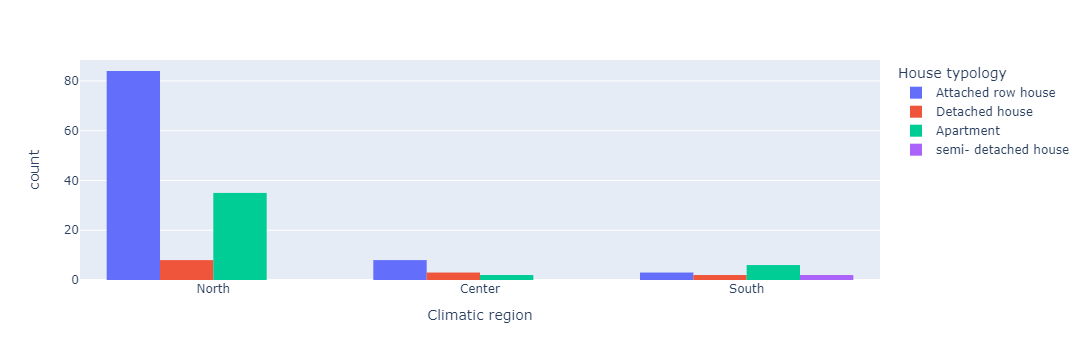

In [4]:
# fig, ax = plt.subplots(figsize=(12, 8))
# sns.countplot(data=data_df, x='Climatic region', hue='House typology', ax=ax)
fig = px.histogram(data_df, 'Climatic region', color='House typology', barmode='group')
fig.show()

**Nhận xét:**
- Đa số những người tham gia khảo sát ở vùng khí hậu miền Bắc, với tổng cộng 127/153 khảo sát. 2 khu vực còn lại không có quá 10 khảo sát ở mỗi loại nhà.
- Đa số những người thực hiện khảo sát ở khu vực khí hậu miền Bắc và miền Trung ở trong nhà mặt đất liền kề.
- Căn hộ chung cư là loại nhà ở phổ biến thứ 2 ở miền Bắc nhưng lại ít phổ biến nhất ở miền Trung.
- Kiểu nhà ở song lập chỉ xuất hiện tại vùng khí hậu miền Nam trong khảo sát này.
- Nhà ở liền kề không phổ biến bằng nhà chung cư đối với những người khảo sáy trong vùng khí hậu phía Nam.

## Phân bố độ tuổi của ngôi nhà và số người trong nhà

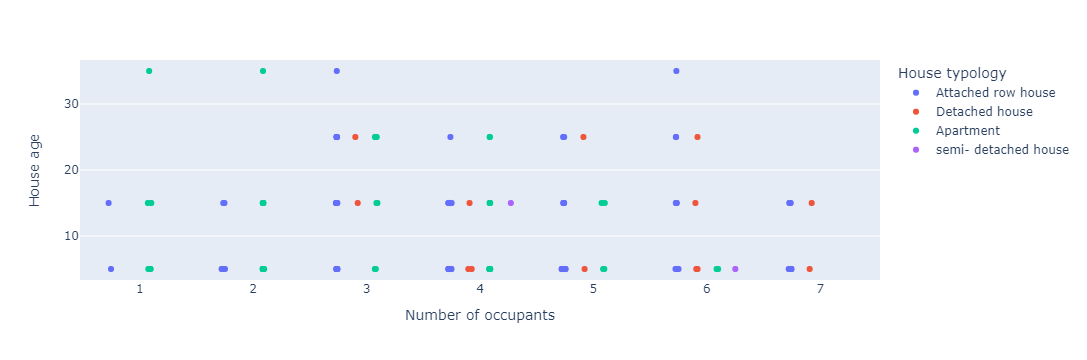

In [4]:
fig = px.strip(data_df, 'Number of occupants', 'House age', 'House typology')
fig.show()

**Nhận xét:**
- Đa số các loại nhà đều được xây dựng trong khoảng 5 - 15 năm tính tới thời điểm khảo sát.
- Phổ biến nhất là có 3 - 6 người sống cùng một nhà.
- Nhà ở liền kề

## Tỷ lệ về mục đích sử dụng và quyền sử dụng nhà. 

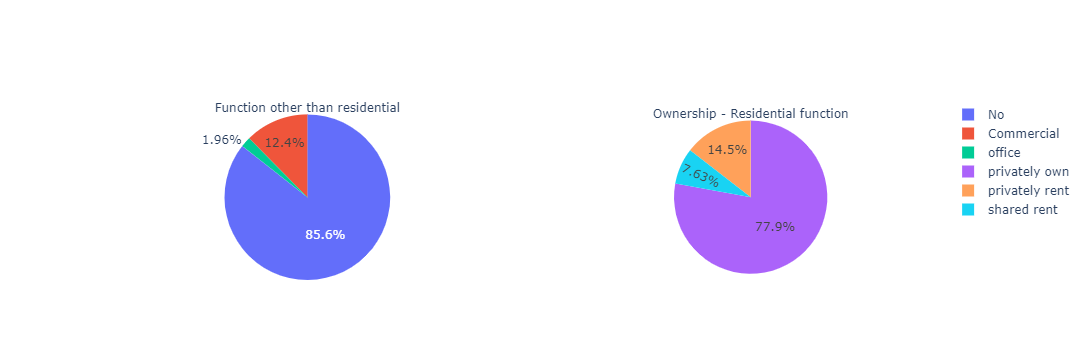

In [4]:
other_func = data_df['Function other than residential'].value_counts()

residential_ownership = data_df[data_df['Function other than residential'] == 'No']['Ownership']
residential_ownership = residential_ownership.value_counts()

fig = make_subplots(cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])
fig.add_pie(labels=other_func.index, values=other_func, name='Function other than residential',
           title={'text': 'Function other than residential'}, row=1, col=1, scalegroup='one')
fig.add_pie(labels=residential_ownership.index, values=residential_ownership, name='Ownership',
           title={'text': 'Ownership - Residential function'}, row=1, col=2, scalegroup='one')
fig.show()

**Nhận xét:**
- Có hơn 85% số người tham gia khảo sát sử dụng ngôi nha chỉ để ở, không có mục đích khác.
- Trong số những người chi sử dụng nhà để ở có đên 77.9% số người sở hữu căn nhà đó.

## Phân bố đánh giá về các tiêu chí ánh sáng và nhiệt độ của những người tham gia khảo sát như thế nào?

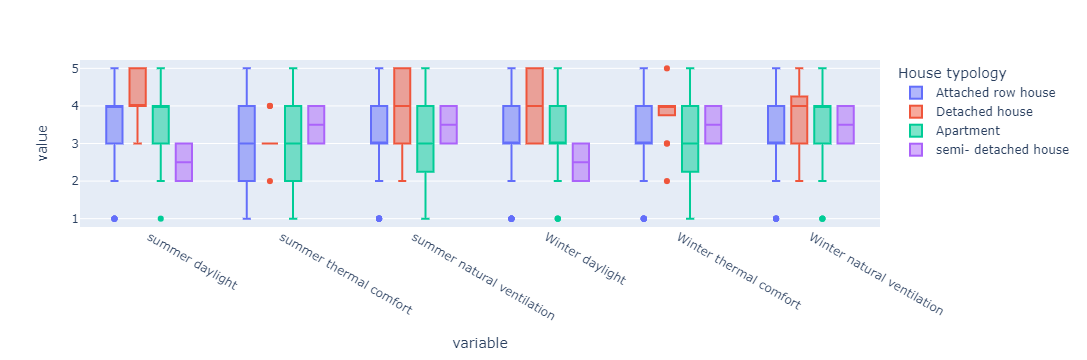

In [9]:
fig = px.box(data_df, y=data_df.columns[8:14], color=data_df.columns[4])
fig.show()

**Nhận xét:**
- Nhà ở riêng lẻ nhận được đánh giá trung bình khá trên tất cả các tiêu chí, thể hiện khá rõ sự chênh lệch cao hơn so với những loại nhà khác ở hầu hết các hạng mục. Đặc biệt không có đánh giá 1 điểm cho tiêu chí nào.
- Nhà ở liền kề gặp nhiều than phiền về cảm giác nhiệt độ mùa hè, tuy nhiên vào mùa đông đánh giá có phần cải thiện.
- Nhà chung cư ngoài việc nhận đánh giá tương tự nhà liền kề ở cảm giác nhiệt độ mùa hè còn bị nhiều đánh giá thấp ở mục thông gió tự nhiên mùa hè và cảm giác nhiệt độ mùa đông

## Những ngôi nhà có diện tích mỗi tầng như thế nào?

<ipython-input-7-95682e57fbf6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



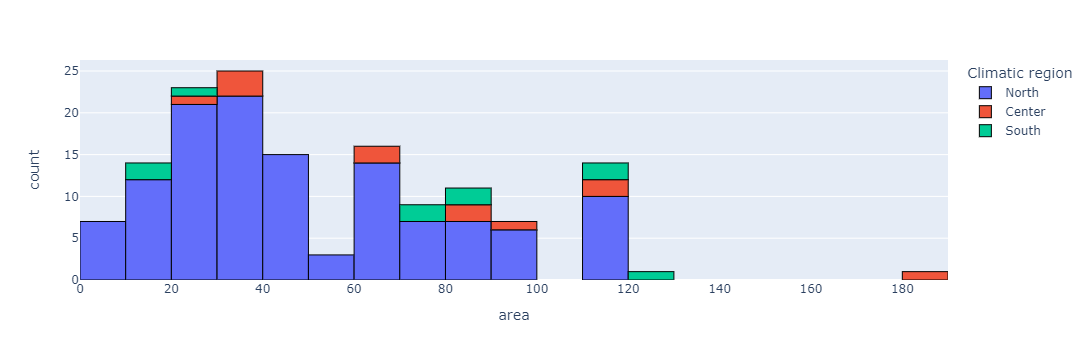

In [7]:
# floor_area = data_df['Total floor area'] / data_df['Number of floor']
area_df = data_df.iloc[:, [0, 6, 7]]
area_df['area'] = area_df['Total floor area'] / area_df['Number of floor']
fig = px.histogram(area_df, x='area', color=area_df.columns[0])
fig.update_traces(marker_line_width=1, marker_line_color='black')
fig.show()

**Nhận xét:**
- Phổ biến nhất là những ngôi nhà có diện tích từ 20 - 40$m^2/tầng$.
- Những nhà có diện tích 10 - 20$m^2/tầng$ cũng xuất hiện khá nhiều với 14 nhà trong bảng khảo sát.
- Khoảng diện tích 50 - 60$m^2/tầng$ không phổ biến bằng những khoảng xung quanh.
- Những ngôi nhà với diện tích 110 - 120$m^2/tầng$ đang trở nên khá phổ biến.
- Những ngôi nhà với diện tích cho mỗi tầng $\leq 10m^2$ chỉ có với những người ở vùng khí hậu miền Bắc.

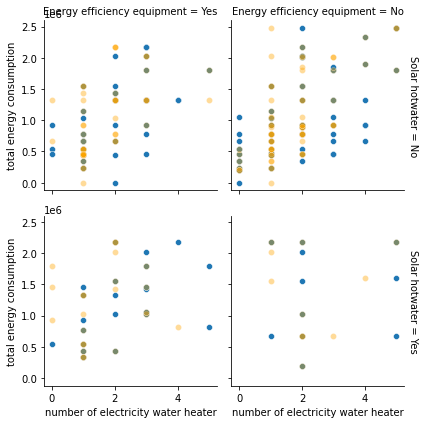

In [9]:
fg = sns.FacetGrid(data = data_df, row ='Solar hotwater', col='Energy efficiency equipment', margin_titles=True)
fg.map(sns.scatterplot, 'number of airconditioning', 'total energy consumption')
fg.map(sns.scatterplot, 'number of electricity water heater', 'total energy consumption', color ='orange', cmap= 'viridis', alpha = 0.4);

In [ ]:
fg = sns.relplot(row ='Solar hotwater', col='Energy efficiency equipment',
                x=data_df[['number of airconditioning', 'number of electricity water heater']],
                y=data_df[['total energy consumption']])

In [16]:
plt.close('all')

# Phân tích dữ liệu.
## Câu hỏi 1
**Câu hỏi đặt ra là:** Chênh lệch giũa lượng điện năng tiêu thụ nhiều nhất và ít nhất trên từng người ở những nhà không sử dụng thiết bị tiết kiệm điện so với những nhà có sử dụng như thế nào?

**Trả lời được câu hỏi này** giúp nhóm phần nào hiểu được sự khác biệt của lượng điện tiêu thụ khi nhà có sử dụng thiết bị tiết kiệm diện so với những nhà không sử dụng, qua đó thấy được hiệu quả của các thiết bị tiết kiệm điện là như thế nào.

**Các bước thực hiện:**
1. Truy xuất 2 cột lượng điện tiêu thụ thấp và cao nhất và chia cho số cư dân của những ngôi nhà.
2. Ghép cột thể hiện xài có hay không xài thiết bị tiết kiệm điện.
3. Trực quan dữ liệu ở trên chia theo những nhà có và không sử dụng thiết bị tiết kiệm điện.

In [ ]:
electricity_per_person = data_df.iloc[:, 16:18].div(data_df['Number of occupants'], 0)
electricity_per_person

In [5]:
electricity_per_person = electricity_per_person.join(data_df['Energy efficiency equipment'])
electricity_per_person

,maximum electricity consumption,minimum electricity consumption,Energy efficiency equipment
0,110000.000000,25000.0,Yes
1,300000.000000,300000.0,No
2,60000.000000,60000.0,No
3,100000.000000,100000.0,No
4,257142.857143,190000.0,Yes
...,...,...,...
148,168750.000000,25000.0,Yes
149,443333.333333,310000.0,Yes
150,337500.000000,120000.0,No
151,120000.000000,50000.0,Yes


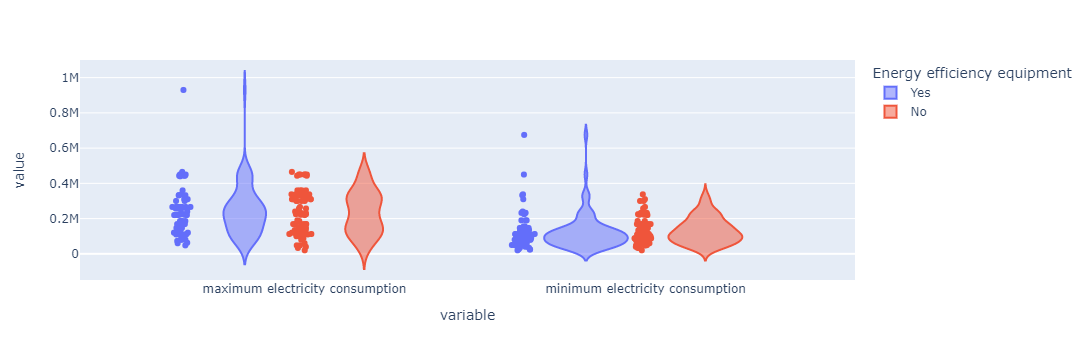

In [8]:
fig = px.violin(electricity_per_person, color='Energy efficiency equipment',
               points='all')
fig.show()

**Nhận xét:**
- Không có nhiều sự khác biệt giữa lượng điện năng tiêu thụ tối đa và tối thiểu trên 1 người ở những nhà có và không sử dụng thiết bị tiết kiệm điện.
- Có 1 số trường hợp lượng diện tiêu thụ của người ở nhà có sử dụng thiết bị tiết kiệm điện còn cao hơn so với những nhà không sử dụng.
- Đa số các nhà dân đều có mức tiêu thụ điện trong khoảng $\leq 400$ kWh.
- 2 trường hợp tiêu thụ điện cao đột biến ở mức 930 kWh tối đa và 675 kWh tối thiểu đều xảy ra ở nhà dân có sử dụng thiết bị tiết kiệm diện.
- Mặc dù có phân bố mức tiêu thụ diện khá tương đồng nhưng có nhiều nhà sử dụng thiết bị tiết kiệm điện đạt mức tiêu thụ điện $\leq 400$ kWh hơn so với những nhà không sử dụng. Như vậy các thiết bị tiết kiệm điện có hiệu quả trong việc giảm lượng điện tiêu thụ.
## Câu hỏi 2
**Câu hỏi đặt ra là:** Lượng điện năng tiêu thụ hằng tháng cao nhất của những nhà khác nhau có thể được giải thích bằng những thuộc tính khác theo công thức nào?

**Trả lời được câu hỏi này** giúp nhóm hiểu được yếu tố nào trong những thuộc tính được ghi lại ở tập dữ liệu này có ảnh hưởng đến lượng điện tiêu thụ và mức độ ảnh hưởng của những yếu tố đó và có thể có được một số biện pháp giảm thiểu lượng điện tiêu thụ.

**Các bước thực hiện:**
1. Mã hóa "No" = 0, "Yes" = 1 và lấy ra các thuộc tính số nhưng bỏ 2 cột "total energy consumption" và "energy per person" do được tính trực tiếp từ cột "maximum electricity consumption".
2. Tính công thức hồi quy biểu diễn "maximum electricity consumption" theo những thuộc tính còn lại.
3. Thực hiện một số thay đổi về các biến độc lập và quay lại bước 2 (nếu có), đánh giá công thức hồi quy.

In [3]:
numeric_df = df.replace({'No': 0, 'Yes': 1}).select_dtypes(exclude='object')
numeric_df.drop(columns=numeric_df.columns[[-2, -1]], inplace=True)
# numeric_df['maximum electricity consumption'] = pd.qcut(numeric_df['maximum electricity consumption'],
#                                                             4, list(range(4)))
numeric_df

,Number of occupants,House age,Number of floor,Total floor area,summer daylight,summer thermal comfort,summer natural ventilation,Winter daylight,Winter thermal comfort,Winter natural ventilation,Gas consumption,maximum electricity consumption,minimum electricity consumption,number of airconditioning,number of electricity water heater,Solar hotwater,Energy efficiency equipment
0,4,5.0,3,110.0,4,2,3,2,2,3,100000.0,440000.0,100000.0,0,1,0,1
1,6,5.0,5,180.0,4,3,4,4,2,4,375000.0,1800000.0,1800000.0,5,5,1,0
2,4,5.0,3,30.0,5,1,3,5,3,3,100000.0,240000.0,240000.0,0,1,0,0
3,1,5.0,5,30.0,4,3,3,4,4,3,100000.0,100000.0,100000.0,0,0,0,0
4,7,5.0,5,240.0,4,3,3,4,4,3,NaN,1800000.0,1330000.0,5,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,4,15.0,2,70.0,4,4,4,4,4,4,100000.0,675000.0,100000.0,1,2,0,1
149,3,5.0,4,180.0,4,2,3,4,3,3,NaN,1330000.0,930000.0,1,1,1,1
150,2,5.0,1,110.0,2,2,2,1,1,1,100000.0,675000.0,240000.0,3,2,0,0
151,2,5.0,2,180.0,3,3,3,3,3,2,100000.0,240000.0,100000.0,1,1,1,1


In [4]:
y = numeric_df['maximum electricity consumption']
X = numeric_df.drop(columns='maximum electricity consumption')
model = OLS(y, add_constant(X), missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     maximum electricity consumption   R-squared:                       0.677
Model:                                         OLS   Adj. R-squared:                  0.609
Method:                              Least Squares   F-statistic:                     9.958
Date:                             Sat, 17 Jul 2021   Prob (F-statistic):           7.19e-13
Time:                                     20:58:29   Log-Likelihood:                -1312.4
No. Observations:                               93   AIC:                             2659.
Df Residuals:                                   76   BIC:                             2702.
Df Model:                                       16                                         
Covariance Type:                         nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -2.448e+05   2.35e+05     -1.043      0.300   -7.12e+05    2.23e+05
Number of occupants                 3.784e+04   3.38e+04      1.119      0.267   -2.95e+04    1.05e+05
House age                           5943.4856   5258.850      1.130      0.262   -4530.421    1.64e+04
Number of floor                     5.438e+04   3.24e+04      1.676      0.098   -1.02e+04    1.19e+05
Total floor area                    -284.7673    643.207     -0.443      0.659   -1565.825     996.291
summer daylight                     6.826e+04   7.73e+04      0.883      0.380   -8.57e+04    2.22e+05
summer thermal comfort               4.39e+04    7.1e+04      0.619      0.538   -9.74e+04    1.85e+05
summer natural ventilation           3.09e+04   6.59e+04      0.469      0.640      -1e+05    1.62e+05
Winter daylight                    -8.891e+04   7.97e+04     -1.116      0.268   -2.48e+05    6.98e+04
Winter thermal comfort              -2.83e+04   7.89e+04     -0.358      0.721   -1.86e+05    1.29e+05
Winter natural ventilation          2.906e+04   6.87e+04      0.423      0.673   -1.08e+05    1.66e+05
Gas consumption                        0.4708      0.290      1.621      0.109      -0.108       1.049
minimum electricity consumption        0.9855      0.156      6.326      0.000       0.675       1.296
number of airconditioning           1.338e+04   6.03e+04      0.222      0.825   -1.07e+05    1.33e+05
number of electricity water heater -2.633e+04   7.03e+04     -0.375      0.709   -1.66e+05    1.14e+05
Solar hotwater                     -3468.0855   1.05e+05     -0.033      0.974   -2.12e+05    2.05e+05
Energy efficiency equipment         1.174e+05   9.06e+04      1.296      0.199   -6.31e+04    2.98e+05
==============================================================================
Omnibus:                        7.660   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.027
Skew:                           0.716   Prob(JB):                       0.0181
Kurtosis:                       2.860   Cond. No.                     4.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Nhận xét:**
- Ngoại trừ biến "minimum electricity consumption", các biến còn lại đều không có ý nghĩa đối với mô hình về mặt thống kê.
- Mô hình có thể giải thích được 60.9% sự thay đổi của biến "maximum electricity consumption"..
- Hệ số điều kiện - biểu diễn khoảng giá trị đầu ra có thể thay đổi khi thực hiện thay đổi nhỏ ở đầu vào - có giá trị rất cao, $4.4 \times 10^6$.
- Có cảnh báo về hiện tượng đa cộng tuyến hay vấn đề khác về số liệu, do đó cần kiểm tra và loại bỏ một số biến có thể gây nên vấn đề.

Sử dụng phương thức `variance_inflation_factor` tính VIF cho các thuộc tính.

In [4]:
vifs = pd.Series([variance_inflation_factor(numeric_df.dropna().values, i) for i in range(numeric_df.shape[1])],
                numeric_df.columns, name='VIF')
vifs

Number of occupants                   15.492572
House age                              3.245257
Number of floor                        7.215510
Total floor area                       5.804647
summer daylight                       49.959969
summer thermal comfort                33.112227
summer natural ventilation            35.685869
Winter daylight                       58.480855
Winter thermal comfort                47.131225
Winter natural ventilation            41.248472
Gas consumption                        5.078573
maximum electricity consumption       10.990658
minimum electricity consumption       10.822817
number of airconditioning             12.471068
number of electricity water heater    13.445624
Solar hotwater                         1.727581
Energy efficiency equipment            2.578687
Name: VIF, dtype: float64

Chọn ra những thuộc tính có VIF < 5, là những thuộc tính không có mối tương quan với nhau hoặc có nhưng không nghiêm trọng. Sau đó phân tích hồi quy giữa "maximum electricity consumption" và những thuộc tính được chọn này

In [5]:
numeric_df.columns[vifs < 5]

Index(['House age', 'Solar hotwater', 'Energy efficiency equipment'], dtype='object')

In [6]:
y = numeric_df['maximum electricity consumption']
X = numeric_df[numeric_df.columns[vifs < 5]]
model = OLS(y, add_constant(X), missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     maximum electricity consumption   R-squared:                       0.014
Model:                                         OLS   Adj. R-squared:                 -0.006
Method:                              Least Squares   F-statistic:                    0.7026
Date:                             Sat, 17 Jul 2021   Prob (F-statistic):              0.552
Time:                                     21:38:36   Log-Likelihood:                -2163.4
No. Observations:                              148   AIC:                             4335.
Df Residuals:                                  144   BIC:                             4347.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         9.08e+05   9.79e+04      9.278      0.000    7.15e+05     1.1e+06
House age                    -597.7636   5730.861     -0.104      0.917   -1.19e+04    1.07e+04
Solar hotwater               1.483e+05   1.12e+05      1.325      0.187   -7.29e+04     3.7e+05
Energy efficiency equipment   1.81e+04   9.26e+04      0.195      0.845   -1.65e+05    2.01e+05
==============================================================================
Omnibus:                       57.110   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.547
Skew:                           0.278   Prob(JB):                      0.00513
Kurtosis:                       1.816   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nhận xét:**
- Tất cả các biến được chọn đều không có ý nghĩa về mặt thống kê.
- Mô hình này không thể giải thích được sự thay đổi của "maximum electricity consumption".
- Như vậy với tập dữ liệu này, lượng điện tiêu thụ không thể được biểu diễn dưới dạng phụ thuộc vào các yếu tố khác, cho thấy các thông tin thu thập được trong tập dữ liệu này gần như không có quan hệ tuyến tính với nhau.

# Tài liệu tham khảo:
- https://stackoverflow.com/questions/67255139/how-to-change-the-edgecolor-of-an-histogram-in-plotly
- https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn
- https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/